In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset from a reliable public source.
# A try-except block is used to handle potential network or file errors gracefully.
try:
    data = pd.read_csv('https://raw.githubusercontent.com/andreduong/credit-card-clustering/master/CC%20GENERAL.csv')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"An error occurred while downloading the dataset: {e}")
    exit()

Dataset loaded successfully.


In [3]:
# Drop the 'CUST_ID' column as it's a unique identifier and not useful for clustering.
if 'CUST_ID' in data.columns:
    data = data.drop('CUST_ID', axis=1)

# Handle missing values by filling them with the mean of their respective columns.
# This is a common strategy to ensure the dataset is complete for analysis.
data.fillna(data.mean(), inplace=True)
print("Missing values handled.")


Missing values handled.


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print("Data has been scaled.")
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("Dimensionality reduced to 2 components using PCA.")

Data has been scaled.
Dimensionality reduced to 2 components using PCA.


In [5]:
# Calculate the Within-Cluster Sum of Squares (WCSS) for K values from 1 to 10.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_data) # Use the full scaled data for finding optimal K
    wcss.append(kmeans.inertia_)

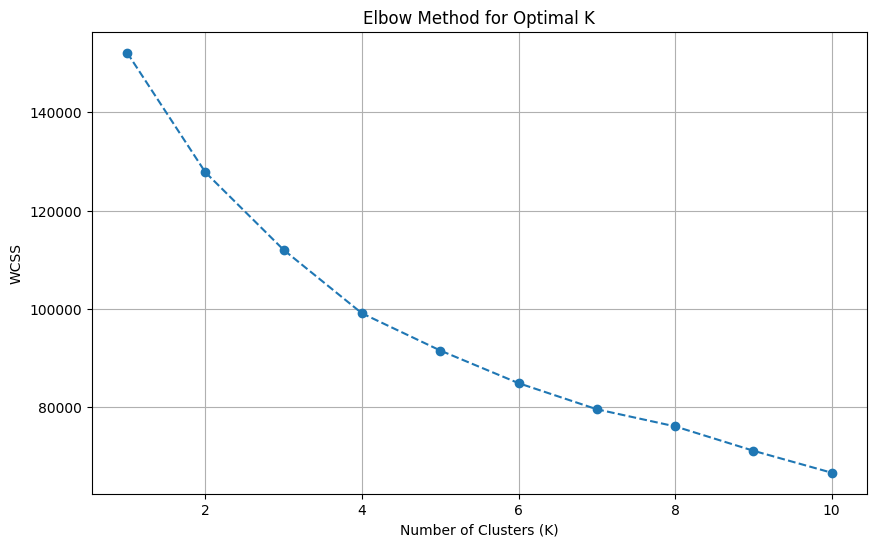

Elbow method plot generated. Optimal K appears to be 4.


In [6]:
# Plot the Elbow Method graph to find the optimal K.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
print("Elbow method plot generated. Optimal K appears to be 4.")


In [7]:
# Apply K-Means using the optimal number of clusters (K=4).
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(scaled_data)

# Add the cluster labels to the PCA dataframe for visualization.
pca_df['Cluster'] = cluster_labels

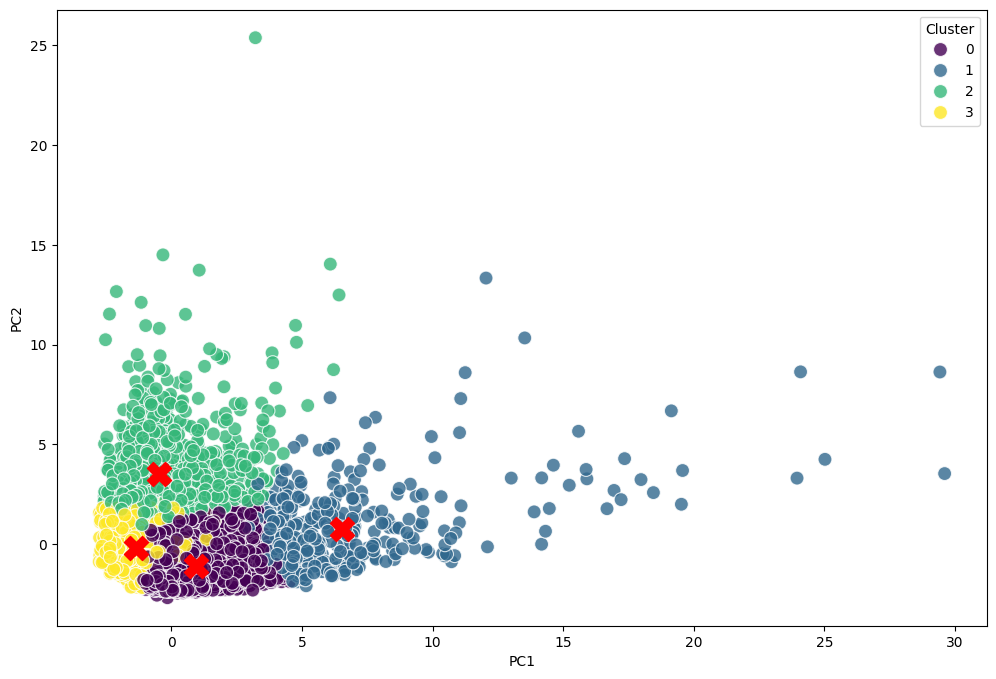

In [8]:
# Create a scatter plot to visualize the customer segments.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
# To plot centroids, we need to transform the centroid coordinates to the PCA space.
centroids_scaled = kmeans_model.cluster_centers_
centroids_pca = pca.transform(centroids_scaled)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')


/tmp/ipython-input-90028287.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


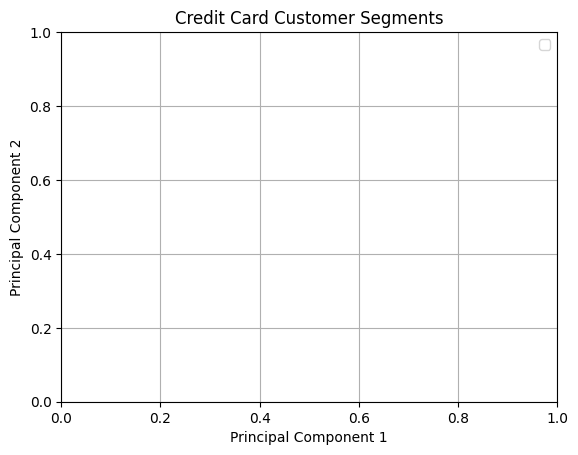

In [9]:
plt.title('Credit Card Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Add the cluster labels back to the original (unscaled) dataframe to analyze the characteristics of each segment.
data['Cluster'] = cluster_labels
cluster_analysis = data.groupby('Cluster').mean()
print("\n--- Mean Characteristics of Each Customer Segment ---")
print(cluster_analysis)


--- Mean Characteristics of Each Customer Segment ---
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         894.907458           0.934734  1236.178934        593.974874   
1        3551.153761           0.986879  7681.620098       5095.878826   
2        4602.462714           0.968415   501.896219        320.373681   
3        1011.751528           0.789871   269.973466        209.853863   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    642.478274    210.570626             0.885165   
1                   2587.208264    653.638891             0.946418   
2                    181.607404   4520.724309             0.287731   
3                     60.386625    595.759339             0.170146   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluste